Έξυπνη Ανίχνευση Σφαλμάτων (Fault Detection) σε MEMS με Machine Learnin


Repository files navigation
README
Wafer Fault Detection
APP URL : - https://waferfaultdetection16.herokuapp.com/

Click On - Train WaferFault Detection to Train the Model with the EXISTING Data Available

Click On- Default File Predict to PREDICT the Model with the EXISTING Data Available

Click On- Custom File Predict to PREDICT the Model While Providing Proper Data

Problem Statement:
Wafer (In electronics), also called a slice or substrate, is a thin slice of semiconductor,
such as a crystalline silicon (c-Si), used for fabricationof integrated circuits and in photovoltaics,
to manufacture solar cells.

The inputs of various sensors for different wafers have been provided.
The goal is to build a machine learning model which predicts whether a wafer needs to be replaced or not
(i.e whether it is working or not) nased on the inputs from various sensors.
There are two classes: +1 and -1.
+1: Means that the wafer is in a working condition and it doesn't need to be replaced.
-1: Means that the wafer is faulty and it needa to be replaced.
Data Description
The client will send data in multiple sets of files in batches at a given location.
Data will contain Wafer names and 590 columns of different sensor values for each wafer.
The last column will have the "Good/Bad" value for each wafer.

Apart from training files, we laso require a "schema" file from the client, which contain all the
relevant information about the training files such as:

Name of the files, Length of Date value in FileName, Length of Time value in FileName, NUmber of Columnns, 
Name of Columns, and their dataype.
Data Validation
In This step, we perform different sets of validation on the given set of training files.

Name Validation: We validate the name of the files based on the given name in the schema file. We have 
created a regex patterg as per the name given in the schema fileto use for validation. After validating 
the pattern in the name, we check for the length of the date in the file name as well as the length of time 
in the file name. If all the values are as per requirements, we move such files to "Good_Data_Folder" else
we move such files to "Bad_Data_Folder."

Number of Columns: We validate the number of columns present in the files, and if it doesn't match with the
value given in the schema file, then the file id moves to "Bad_Data_Folder."

Name of Columns: The name of the columns is validated and should be the same as given in the schema file. 
If not, then the file is moved to "Bad_Data_Folder".

The datatype of columns: The datatype of columns is given in the schema file. This is validated when we insert
the files into Database. If the datatype is wrong, then the file is moved to "Bad_Data_Folder."

Null values in columns: If any of the columns in a file have all the values as NULL or missing, we discard such
a file and move it to "Bad_Data_Folder".
Data Insertion in Database
 Database Creation and Connection: Create a database with the given name passed. If the database is already created,
 open the connection to the database.
 
 Table creation in the database: Table with name - "Good_Data", is created in the database for inserting the files 
 in the "Good_Data_Folder" based on given column names and datatype in the schema file. If the table is already
 present, then the new table is not created and new files are inserted in the already present table as we want 
 training to be done on new as well as old training files.
 
 Insertion of file in the table: All the files in the "Good_Data_Folder" are inserted in the above-created table. If
 any file has invalid data type in any of the columns, the file is not loaded in the table and is moved to 
 "Bad_Data_Folder".
Model Training
 Data Export from Db: The data in a stored database is exported as a CSV file to be used for model training.
 
 Data Preprocessing: 
    Check for null values in the columns. If present, impute the null values using the KNN imputer.
    
    Check if any column has zero standard deviation, remove such columns as they don't give any information during 
    model training.
    
 Clustering: KMeans algorithm is used to create clusters in the preprocessed data. The optimum number of clusters 
 is selected
Create a file "Dockerfile" with below content
FROM python:3.7
COPY . /app
WORKDIR /app
RUN pip install -r requirements.txt
ENTRYPOINT [ "python" ]
CMD [ "main.py" ]
Create a "Procfile" with following content
web: gunicorn main:app
create a file ".circleci\config.yml" with following content
version: 2.1
orbs:
  heroku: circleci/heroku@1.0.1
jobs:
  build-and-test:
    executor: heroku/default
    docker:
      - image: circleci/python:3.6.2-stretch-browsers
        auth:
          username: mydockerhub-user
          password: $DOCKERHUB_PASSWORD  # context / project UI env-var reference
    steps:
      - checkout
      - restore_cache:
          key: deps1-{{ .Branch }}-{{ checksum "requirements.txt" }}
      - run:
          name: Install Python deps in a venv
          command: |
            echo 'export TAG=0.1.${CIRCLE_BUILD_NUM}' >> $BASH_ENV
            echo 'export IMAGE_NAME=python-circleci-docker' >> $BASH_ENV
            python3 -m venv venv
            . venv/bin/activate
            pip install --upgrade pip
            pip install -r requirements.txt
      - save_cache:
          key: deps1-{{ .Branch }}-{{ checksum "requirements.txt" }}
          paths:
            - "venv"
      - run:
          command: |
            . venv/bin/activate
            python -m pytest -v tests/test_script.py
      - store_artifacts:
          path: test-reports/
          destination: tr1
      - store_test_results:
          path: test-reports/
      - setup_remote_docker:
          version: 19.03.13
      - run:
          name: Build and push Docker image
          command: |
            docker build -t $DOCKERHUB_USER/$IMAGE_NAME:$TAG .
            docker login -u $DOCKERHUB_USER -p $DOCKER_HUB_PASSWORD_USER docker.io
            docker push $DOCKERHUB_USER/$IMAGE_NAME:$TAG
  deploy:
    executor: heroku/default
    steps:
      - checkout
      - run:
          name: Storing previous commit
          command: |
            git rev-parse HEAD > ./commit.txt
      - heroku/install
      - setup_remote_docker:
          version: 18.06.0-ce
      - run:
          name: Pushing to heroku registry
          command: |
            heroku container:login
            #heroku ps:scale web=1 -a $HEROKU_APP_NAME
            heroku container:push web -a $HEROKU_APP_NAME
            heroku container:release web -a $HEROKU_APP_NAME

workflows:
  build-test-deploy:
    jobs:
      - build-and-test
      - deploy:
          requires:
            - build-and-test
          filters:
            branches:
              only:
                - main
to create requirements.txt
pip freeze>requirements.txt
initialize git repo
git init
git add .
git commit -m "first commit"
git branch -M main
git remote add origin <github_url>
git push -u origin main
create a account at circle ci
Circle CI

setup your project
Setup project

Select project setting in CircleCI and below environment variable
DOCKERHUB_USER
DOCKER_HUB_PASSWORD_USER
HEROKU_API_KEY
HEROKU_APP_NAME
HEROKU_EMAIL_ADDRESS
DOCKER_IMAGE_NAME=wafercircle3270303
to update the modification
git add .
git commit -m "proper message"
git push 
#docker login -u $DOCKERHUB_USER -p $DOCKER_HUB_PASSWORD_USER docker.io
About
A Machine Learning model which predicts whether a wafer needs to be replaced or not (i.e whether it is working (+1 ) or not( -1)) based on the inputs from various sensors.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wafer-fault-detection/wafer_07012020_041011.csv


In [2]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
import pickle

In [7]:
import pandas as pd

data = pd.read_csv('/kaggle/input/wafer-fault-detection/wafer_07012020_041011.csv')
data.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-501,3076.81,2158.75,2208.2334,1517.0152,1.0980,100,110.1900,0.1247,1.4357,...,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,-1
1,Wafer-502,2951.62,2511.92,2253.5111,1397.5060,0.9660,100,109.7611,0.1210,1.5527,...,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,-1
2,Wafer-503,2930.42,2505.17,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.4588,...,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,-1
3,Wafer-504,2997.28,2357.99,2141.0667,1236.5212,0.9698,100,98.3344,0.1238,1.5973,...,NaN,0.4962,0.0086,0.0024,1.7297,-0.0012,0.0252,0.0081,0.0000,-1
4,Wafer-505,3025.10,2475.18,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.5525,...,NaN,0.4983,0.0159,0.0041,3.1927,-0.0012,0.0252,0.0081,0.0000,-1


In [8]:
data.rename(columns={"Unnamed: 0":"Wafer"},inplace=True)
data.rename(columns={"Good/Bad":"Output"},inplace=True)

In [9]:
data.iloc[0:1]

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Output
0,Wafer-501,3076.81,2158.75,2208.2334,1517.0152,1.098,100,110.19,0.1247,1.4357,...,64.2405,0.5016,0.0152,0.004,3.0319,0.0465,0.0299,0.009,64.2405,-1


In [10]:
data.isna().sum(True) # check for the count of null values per column

0     36
1     32
2     36
3     48
4     48
      ..
95    28
96    36
97    36
98    28
99    32
Length: 100, dtype: int64

In [11]:
data.fillna("NaN",inplace=True) #filling with null values for now
data.isnull().sum(True)

/tmp/ipykernel_36/3464390532.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NaN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("NaN",inplace=True) #filling with null values for now


0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

In [12]:
data1=data.drop(["Wafer"],axis=1) # remove the unnamed column as it doesn't contribute to prediction.
data1

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Output
0,3076.81,2158.75,2208.2334,1517.0152,1.0980,100,110.1900,0.1247,1.4357,0.0089,...,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,-1
1,2951.62,2511.92,2253.5111,1397.5060,0.9660,100,109.7611,0.1210,1.5527,0.0119,...,0.0,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,-1
2,2930.42,2505.17,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.4588,-0.0143,...,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,-1
3,2997.28,2357.99,2141.0667,1236.5212,0.9698,100,98.3344,0.1238,1.5973,-0.0534,...,NaN,0.4962,0.0086,0.0024,1.7297,-0.0012,0.0252,0.0081,0.0000,-1
4,3025.1,2475.18,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.5525,-0.0078,...,NaN,0.4983,0.0159,0.0041,3.1927,-0.0012,0.0252,0.0081,0.0000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2996.89,2492.4,2217.8667,1275.0917,1.5487,100,105.2933,0.1230,1.5455,-0.0140,...,NaN,0.5071,0.0123,0.0038,2.4294,0.0227,0.0149,0.0052,65.4831,-1
96,2990.85,2485.99,2167.9444,861.8041,1.4140,100,106.6033,0.1243,1.4647,-0.0212,...,NaN,0.5015,0.0130,0.0042,2.5884,0.0227,0.0149,0.0052,65.4831,-1
97,3059.43,2473.55,2214.9333,1663.7024,1.0203,100,100.4456,0.1247,1.4262,-0.0209,...,108.6076,0.4973,0.0073,0.0017,1.4716,0.0300,0.0326,0.0114,108.6076,-1
98,3024.54,2420.25,2167.9444,861.8041,1.4140,100,106.6033,0.1243,1.4849,-0.0072,...,NaN,0.5006,0.0068,0.0018,1.3667,0.0300,0.0326,0.0114,108.6076,-1


In [13]:
x=data1.drop(["Output"],axis=1) # create separate features and labels
x.head(2)

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,3076.81,2158.75,2208.2334,1517.0152,1.098,100,110.1900,0.1247,1.4357,0.0089,...,0.009,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405
1,2951.62,2511.92,2253.5111,1397.5060,0.966,100,109.7611,0.1210,1.5527,0.0119,...,0.0081,0.0,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000


In [14]:
y=data1["Output"]
y.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: Output, dtype: int64

In [15]:
data1.isna().sum()

Sensor-1      0
Sensor-2      0
Sensor-3      0
Sensor-4      0
Sensor-5      0
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Output        0
Length: 591, dtype: int64

In [16]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_data=imputer.fit_transform(x)
x=pd.DataFrame(new_data)
x

,0,1,2,3,4,5,6,7,8,9,...,564,565,566,567,568,569,570,571,572,573
0,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,0.009000,64.240500,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405
1,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.008100,0.000000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000
2,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,0.004033,73.010633,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000
3,2997.28,2357.99,2141.0667,1236.5212,0.9698,100.0,98.3344,0.1238,1.5973,-0.0534,...,0.005067,51.803633,0.4962,0.0086,0.0024,1.7297,-0.0012,0.0252,0.0081,0.0000
4,3025.10,2475.18,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.5525,-0.0078,...,0.005567,50.728767,0.4983,0.0159,0.0041,3.1927,-0.0012,0.0252,0.0081,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2996.89,2492.40,2217.8667,1275.0917,1.5487,100.0,105.2933,0.1230,1.5455,-0.0140,...,0.004300,35.549600,0.5071,0.0123,0.0038,2.4294,0.0227,0.0149,0.0052,65.4831
96,2990.85,2485.99,2167.9444,861.8041,1.4140,100.0,106.6033,0.1243,1.4647,-0.0212,...,0.006167,52.293200,0.5015,0.0130,0.0042,2.5884,0.0227,0.0149,0.0052,65.4831
97,3059.43,2473.55,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4262,-0.0209,...,0.011400,108.607600,0.4973,0.0073,0.0017,1.4716,0.0300,0.0326,0.0114,108.6076
98,3024.54,2420.25,2167.9444,861.8041,1.4140,100.0,106.6033,0.1243,1.4849,-0.0072,...,0.006167,52.293200,0.5006,0.0068,0.0018,1.3667,0.0300,0.0326,0.0114,108.6076


In [17]:
a=x.describe()
columns=x.columns
columns

RangeIndex(start=0, stop=574, step=1)

In [18]:
data_n = x.describe()
data_n

,0,1,2,3,4,5,6,7,8,9,...,564,565,566,567,568,569,570,571,572,573
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3003.614467,2504.110567,2187.307779,1193.136128,1.196562,100.0,102.52551,0.123413,1.487260,0.000899,...,0.005312,57.245810,0.500007,0.015468,0.003865,3.091090,0.023001,0.017238,0.005513,57.579040
std,55.786124,83.501725,33.433605,196.895604,0.315792,0.0,4.17551,0.001539,0.060808,0.015851,...,0.001414,15.742060,0.003733,0.006548,0.001267,1.296146,0.011036,0.005889,0.002113,26.622063
min,2890.670000,2158.750000,2113.077800,861.804100,0.802400,100.0,94.12560,0.119300,1.369800,-0.053400,...,0.002100,0.000000,0.492400,0.006800,0.001700,1.366700,-0.001200,0.007700,0.002100,0.000000
25%,2967.537500,2461.855000,2164.300000,1070.043900,0.879500,100.0,100.36330,0.122150,1.441025,-0.008900,...,0.004425,48.126067,0.496975,0.011750,0.003175,2.367300,0.018400,0.012700,0.004000,40.253600
50%,2995.400000,2504.515000,2179.077800,1153.896950,1.290600,100.0,102.76885,0.123400,1.482750,-0.000600,...,0.005267,54.803600,0.500400,0.014150,0.003600,2.814000,0.025200,0.015800,0.005150,65.483100
75%,3042.445000,2561.585000,2216.477800,1302.660700,1.486900,100.0,105.29330,0.124700,1.534825,0.009275,...,0.006033,65.199000,0.502225,0.017325,0.004125,3.439000,0.033200,0.019000,0.006000,73.865700
max,3158.880000,2698.140000,2253.511100,1820.061300,1.775100,100.0,110.54220,0.126500,1.605300,0.045500,...,0.011400,108.607600,0.509800,0.046200,0.009900,9.184100,0.049200,0.032600,0.011400,108.607600


Κάνε έλεγχο για στήλες που δεν συνεισφέρουν στην πρόβλεψη. Αν η τυπική απόκλιση μιας στήλης είναι μηδέν, σημαίνει ότι έχει σταθερές τιμές και δίνει το ίδιο αποτέλεσμα τόσο για καλούς όσο και για χαλασμένους αισθητήρες. Ετοίμασε τη λίστα με αυτές τις στήλες για να διαγραφούν.

In [19]:
columns=x.columns
data_n = x.describe()
col_to_drop=[]
for a in columns:
    if (data_n[a]['std'] == 0): # check if standard deviation is zero
        col_to_drop.append(a)# prepare the list of columns with standard deviation zero
col_to_drop #the list of columns with standard deviation zero

[5,
 13,
 42,
 49,
 52,
 69,
 74,
 96,
 137,
 145,
 174,
 175,
 182,
 185,
 186,
 187,
 188,
 189,
 190,
 202,
 205,
 221,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 235,
 236,
 237,
 238,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 268,
 276,
 305,
 306,
 307,
 314,
 317,
 318,
 319,
 320,
 321,
 322,
 334,
 339,
 355,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 369,
 370,
 371,
 372,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 402,
 410,
 437,
 438,
 439,
 446,
 449,
 450,
 451,
 452,
 453,
 454,
 466,
 469,
 485,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 499,
 500,
 501,
 502,
 505,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522]

In [22]:
! pip install kneed

Η βιβλιοθήκη kneed είναι ένα εργαλείο της Python που χρησιμοποιείται για να βρίσκουμε το "γόνατο" (knee) ή "αγκώνα" (elbow) σε μια καμπύλη — δηλαδή το σημείο όπου η καμπύλη αλλάζει απότομα πορεία. Χρησιμοποιείται συχνά σε προβλήματα όπου θέλουμε να βρούμε το ιδανικό σημείο ισορροπίας, π.χ.:

📌 Πού χρησιμοποιείται το kneed:
🔹 1. Elbow Method στο K-Means Clustering
Όταν επιλέγουμε τον ιδανικό αριθμό των clusters:

Φτιάχνουμε ένα γράφημα με αριθμό clusters vs inertia (σφάλμα).

Το "γόνατο" της καμπύλης είναι το ιδανικό σημείο — και η βιβλιοθήκη kneed μπορεί να το εντοπίσει αυτόματα.

In [23]:
from kneed import KneeLocator   #! pip install kneed


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

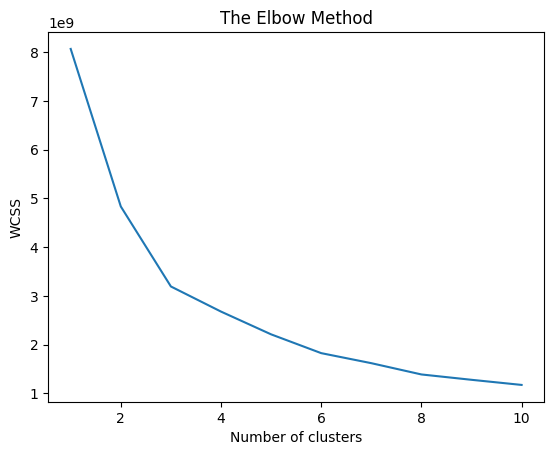

In [24]:
wcss =[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
    kmeans.fit(x) # fitting the data to the KMeans Algorithm
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.show()
plt.savefig('K-Means_Elbow.PNG') # saving the elbow plot locally

In [25]:
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
number_of_clusters=kn.knee #  using the elbow plot to find the number of optimum clusters
number_of_clusters

3

βρίσκεις τον ιδανικό αριθμό clusters (ομάδων) που πρέπει να χρησιμοποιήσεις σε έναν αλγόριθμο ομαδοποίησης, όπως το K-Means.

In [26]:
kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(x) #  divide data into clusters
y_kmeans

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2,
       1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0], dtype=int32)

In [27]:
import pickle
pickle.dump(kmeans, open("KMeans.sav", 'wb'))

In [28]:
x['Cluster']=y_kmeans 
x["Cluster"]

0     1
1     0
2     0
3     0
4     2
     ..
95    2
96    0
97    0
98    0
99    0
Name: Cluster, Length: 100, dtype: int32

In [29]:
x['Labels']=y
x

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,Cluster,Labels
0,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,1,-1
1,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,0,-1
2,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,0,-1
3,2997.28,2357.99,2141.0667,1236.5212,0.9698,100.0,98.3344,0.1238,1.5973,-0.0534,...,0.4962,0.0086,0.0024,1.7297,-0.0012,0.0252,0.0081,0.0000,0,-1
4,3025.10,2475.18,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.5525,-0.0078,...,0.4983,0.0159,0.0041,3.1927,-0.0012,0.0252,0.0081,0.0000,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2996.89,2492.40,2217.8667,1275.0917,1.5487,100.0,105.2933,0.1230,1.5455,-0.0140,...,0.5071,0.0123,0.0038,2.4294,0.0227,0.0149,0.0052,65.4831,2,-1
96,2990.85,2485.99,2167.9444,861.8041,1.4140,100.0,106.6033,0.1243,1.4647,-0.0212,...,0.5015,0.0130,0.0042,2.5884,0.0227,0.0149,0.0052,65.4831,0,-1
97,3059.43,2473.55,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4262,-0.0209,...,0.4973,0.0073,0.0017,1.4716,0.0300,0.0326,0.0114,108.6076,0,-1
98,3024.54,2420.25,2167.9444,861.8041,1.4140,100.0,106.6033,0.1243,1.4849,-0.0072,...,0.5006,0.0068,0.0018,1.3667,0.0300,0.0326,0.0114,108.6076,0,-1


In [30]:
list_of_clusters=x['Cluster'].unique() # getting the unique clusters from our dataset
list_of_clusters

array([1, 0, 2], dtype=int32)

In [31]:
for i in list_of_clusters:
    cluster_data=x[x['Cluster']==i] # filter the data for one cluster

    # Prepare the feature and Label columns
    cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)
    cluster_label= cluster_data['Labels']

    # splitting the data into training and test set for each cluster one by one
    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=1 / 3, random_state=355)

In [69]:
xgb = XGBClassifier(objective='binary:logistic')
### Initializing with different combination of parameters
param_grid_xgboost = {

                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [3, 5, 10, 20],
                'n_estimators': [10, 50, 100, 200]

            } 
### Creating an object of the Grid Search class
grid2= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5)          
grid2.fit(x_train, y_train)# finding the best parameters

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.958 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.958 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.833 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.958 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.958 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.958 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.833 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.958 total time=   0.0

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [70]:
grid2.fit(x_train, y_train)# finding the best parameters

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.958 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.958 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.833 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.958 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.958 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.958 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.833 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.958 total time=   0.0

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [71]:
grid2.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

In [72]:
# extracting the best parameters
learning_rate = grid2.best_params_['learning_rate']
max_depth = grid2.best_params_['max_depth']
n_estimators = grid2.best_params_['n_estimators']

In [73]:
xgb = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
xgb.fit(x_train, y_train)# training the mew model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
xgb.score(x_train, y_train)

0.975

In [75]:
xgb.score(x_test, y_test)

1.0

In [76]:
prediction_xgboost = xgb.predict(x_test)
prediction_xgboost

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [77]:
xgb_score=xgb.score(x_test,y_test)
xgb_score

1.0

In [78]:
prediction_random_forest=clf.predict(x_test)
prediction_random_forest

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [79]:
random_forest_score=clf.score(x_test,y_test)
random_forest_score

1.0

In [80]:
#if using for coding
try:
    if len(y_test.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        xgb_score_accuracy_score = accuracy_score(y_test, prediction_xgboost)
        print("XGB accuracy_score:"+str(xgb_score))
    else:
        xgb_score_roc_auc_score = roc_auc_score(y_test, prediction_xgboost) # AUC for xgb
        print("XGB roc_auc_score:"+str(xgb_score))
       

    # create best model for Random Forest
    prediction_random_forest=clf.predict(x_test) # prediction using the Random Forest Algorithm

    if len(y_test.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        random_forest_score_accuracy_score = accuracy_score(y_test,prediction_random_forest)
        print("Random Forest accuracy_score:"+str(random_forest_score))
    else:
        random_forest_score_roc_auc_score = roc_auc_score(y_test, prediction_random_forest) # AUC for Random Forest
        print("Random Forest roc_auc_score:"+str(random_forest_score))
        
    #comparing the two models
    if(random_forest_score <  xgb_score):
        print("XGB Score:"+str(xgb_score))
    else:
        print("Random Forest score :"+str(random_forest_score))
except Exception as e:
    raise Exception()

Exception: 

In [81]:
xgb_score_accuracy_score = accuracy_score(y_test, prediction_xgboost)
print(xgb_score_accuracy_score)
print("XGB roc_auc_score:"+str(xgb_score))
print("Random Forest accuracy_score:"+str(random_forest_score))
print("Random Forest roc_auc_score:"+str(random_forest_score))

1.0
XGB roc_auc_score:1.0
Random Forest accuracy_score:1.0
Random Forest roc_auc_score:1.0
